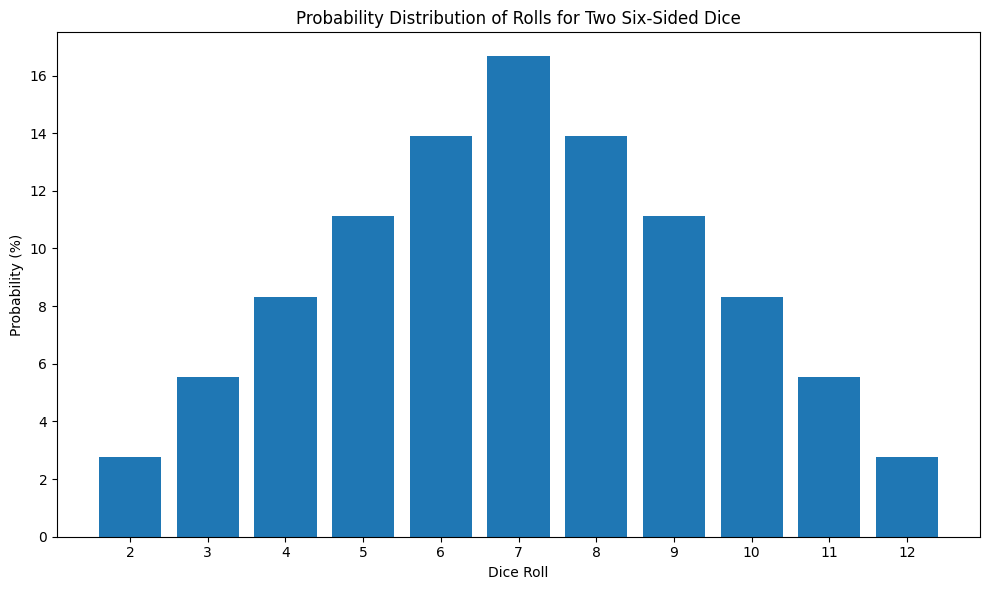

In [334]:
# Calculate the probabilities for each possible roll
probabilities = [0] * 13  
total_rolls = 0

for die1 in range(1, 7):
    for die2 in range(1, 7):
        total_rolls += 1
        sum_of_dice = die1 + die2
        probabilities[sum_of_dice] += 1

# Convert counts to probabilities
probabilities = [count * 100 / total_rolls for count in probabilities] 

# Create the bar graph
plt.figure(figsize=(10, 6))
plt.bar(range(2, 13), probabilities[2:])
plt.xlabel('Dice Roll')
plt.ylabel('Probability (%)')
plt.title('Probability Distribution of Rolls for Two Six-Sided Dice')
plt.xticks(range(2, 13))
plt.tight_layout()
plt.show()

In [376]:
import random

# Define the board layout and cards
board = ["Go", "Mediterranean Ave", "Community Chest #1", "Baltic Ave", "Income Tax",
         "Reading Railroad", "Oriental Ave", "Chance #1", "Vermont Ave", "Connecticut Ave",
         "Jail", "St Charles Place", "Electric Company", "States Ave", "Virginia Ave", "Pennsylvania Railroad",
         "St James Place", "Community Chest #2", "Tennessee Ave", "New York Ave", "Free Parking",
         "Kentucky Ave", "Chance #2", "Indiana Ave", "Illinois Ave", "B&O Railroad",
         "Atlantic Ave", "Ventnor Ave", "Water Works", "Marvin Gardens", "Go to Jail",
         "Pacific Ave", "North Carolina Ave", "Community Chest #3", "Pennsylvania Ave", "Short Line Railroad",
         "Chance #3", "Park Place", "Luxury Tax", "Boardwalk"]

chance_cards = ["Advance to Go", "Advance to Illinois Ave", "Advance to St Charles Place",
                "Advance to nearest Utility", "Advance to nearest Railroad", "Advance to Jail",
                "Advance to Boardwalk", "Advance to Reading Railroad", "Advance 3 spaces back",
                "Advance to nearest Railroad", "NA", "NA", "NA", "NA", "NA", "NA"]

community_chest_cards = ["Advance to Go", "Advance to Jail", "NA", "NA", "NA", "NA", "NA", "NA",
                         "NA", "NA", "NA", "NA", "NA", "NA", "NA", "NA"]

# Function to simulate a single roll of two dice
def roll_dice():
    return random.randint(1, 6) + random.randint(1, 6)

def nearest_utility_position(current_position):
    electric_company_position = board.index("Electric Company")
    water_works_position = board.index("Water Works")
    chance_1_position = board.index("Chance #1")
    chance_2_position = board.index("Chance #2")
    chance_3_position = board.index("Chance #3")
    
    if current_position == chance_2_position and "Advance to nearest Utility" in chance_cards:
        return water_works_position
    elif (current_position == chance_1_position or current_position == chance_3_position) and "Advance to nearest Utility" in chance_cards:
        return electric_company_position

# Helper function to find the nearest railroad square
def nearest_station_position(current_position):
    railroads = ["Reading Railroad", "Pennsylvania Railroad", "B&O Railroad", "Short Line Railroad"]
    nearest = min(railroads, key=lambda railroad: abs(current_position - board.index(railroad)))
    return board.index(nearest)
    
# Function to handle chance card logic
def handle_chance(current_position):
    card = random.choice(chance_cards)
    if "Advance to Go" in card:
        return board.index("Go")
    elif "Advance to Illinois Ave" in card:
        return board.index("Illinois Ave")
    elif "Advance to St Charles Place" in card:
        return board.index("St Charles Place")
    elif "Advance to nearest Utility" in card:
        return nearest_utility_position(current_position)
    elif "Advance to nearest Railroad" in card:
        return nearest_station_position(current_position)
    elif "Advance to Jail" in card:
        return board.index("Jail")
    elif "Advance to Boardwalk" in card:
        return board.index("Boardwalk")
    elif "Advance to Reading Railroad" in card:
        return board.index("Reading Railroad")
    elif "Advance 3 spaces back" in card:
        return (current_position - 3) % len(board)
    return current_position

# Function to handle community chest card logic
def handle_community_chest(current_position):
    card = random.choice(community_chest_cards)
    if "Advance to Go" in card:
        return board.index("Go")
    elif "Advance to Jail" in card:
        return board.index("Jail")
    return current_position
    
def go_to_jail(current_position):
    if board[current_position] == "Go to Jail":
        return board.index("Jail")
    return current_position


# Simulation
position_counts = [0] * len(board)
current_position = 0
doubles_count = 0

for _ in range(100000000):
    roll = roll_dice()
    if roll == 2 * roll_dice():  # Check for doubles
        doubles_count += 1
    else:
        doubles_count = 0

    if doubles_count == 3 or board[current_position] == "Go to Jail":
        current_position = board.index("Jail")
        doubles_count = 0
    else:
        current_position = (current_position + roll) % len(board)

        current_position = go_to_jail(current_position)  # Apply the go_to_jail function here

        if board[current_position].startswith("Chance"):
            current_position = handle_chance(current_position)
        elif board[current_position].startswith("Community Chest"):
            current_position = handle_community_chest(current_position)

    if current_position != board.index("Go to Jail"):  # Skip counting "Go to Jail" position
        position_counts[current_position] += 1

# Display results
for i, count in enumerate(position_counts):
    print(f"{board[i]}: {count}")


Go: 3123268
Mediterranean Ave: 2179017
Community Chest #1: 1930050
Baltic Ave: 2217012
Income Tax: 2378275
Reading Railroad: 3018327
Oriental Ave: 2310428
Chance #1: 884175
Vermont Ave: 2365323
Connecticut Ave: 2352632
Jail: 5895920
St Charles Place: 2756194
Electric Company: 2650185
States Ave: 2403739
Virginia Ave: 2486695
Pennsylvania Railroad: 2645844
St James Place: 2795842
Community Chest #2: 2579150
Tennessee Ave: 2916331
New York Ave: 3061904
Free Parking: 2856448
Kentucky Ave: 2805590
Chance #2: 1034158
Indiana Ave: 2708006
Illinois Ave: 3158399
B&O Railroad: 3031786
Atlantic Ave: 2684799
Ventnor Ave: 2657379
Water Works: 2789990
Marvin Gardens: 2571076
Go to Jail: 0
Pacific Ave: 2662830
North Carolina Ave: 2610004
Community Chest #3: 2374773
Pennsylvania Ave: 2486500
Short Line Railroad: 2713701
Chance #3: 864081
Park Place: 2196183
Luxury Tax: 2191590
Boardwalk: 2652396


In [378]:
# Calculate the total number of rolls
total_rolls = sum(position_counts)

# Calculate the percentage frequency for each position
percentage_frequencies = [(count / total_rolls) * 100 for count in position_counts]

# Display the results
for i, percentage in enumerate(percentage_frequencies):
    print(f"{board[i]}: {percentage:.4f}%")


Go: 3.1233%
Mediterranean Ave: 2.1790%
Community Chest #1: 1.9301%
Baltic Ave: 2.2170%
Income Tax: 2.3783%
Reading Railroad: 3.0183%
Oriental Ave: 2.3104%
Chance #1: 0.8842%
Vermont Ave: 2.3653%
Connecticut Ave: 2.3526%
Jail: 5.8959%
St Charles Place: 2.7562%
Electric Company: 2.6502%
States Ave: 2.4037%
Virginia Ave: 2.4867%
Pennsylvania Railroad: 2.6458%
St James Place: 2.7958%
Community Chest #2: 2.5791%
Tennessee Ave: 2.9163%
New York Ave: 3.0619%
Free Parking: 2.8564%
Kentucky Ave: 2.8056%
Chance #2: 1.0342%
Indiana Ave: 2.7080%
Illinois Ave: 3.1584%
B&O Railroad: 3.0318%
Atlantic Ave: 2.6848%
Ventnor Ave: 2.6574%
Water Works: 2.7900%
Marvin Gardens: 2.5711%
Go to Jail: 0.0000%
Pacific Ave: 2.6628%
North Carolina Ave: 2.6100%
Community Chest #3: 2.3748%
Pennsylvania Ave: 2.4865%
Short Line Railroad: 2.7137%
Chance #3: 0.8641%
Park Place: 2.1962%
Luxury Tax: 2.1916%
Boardwalk: 2.6524%


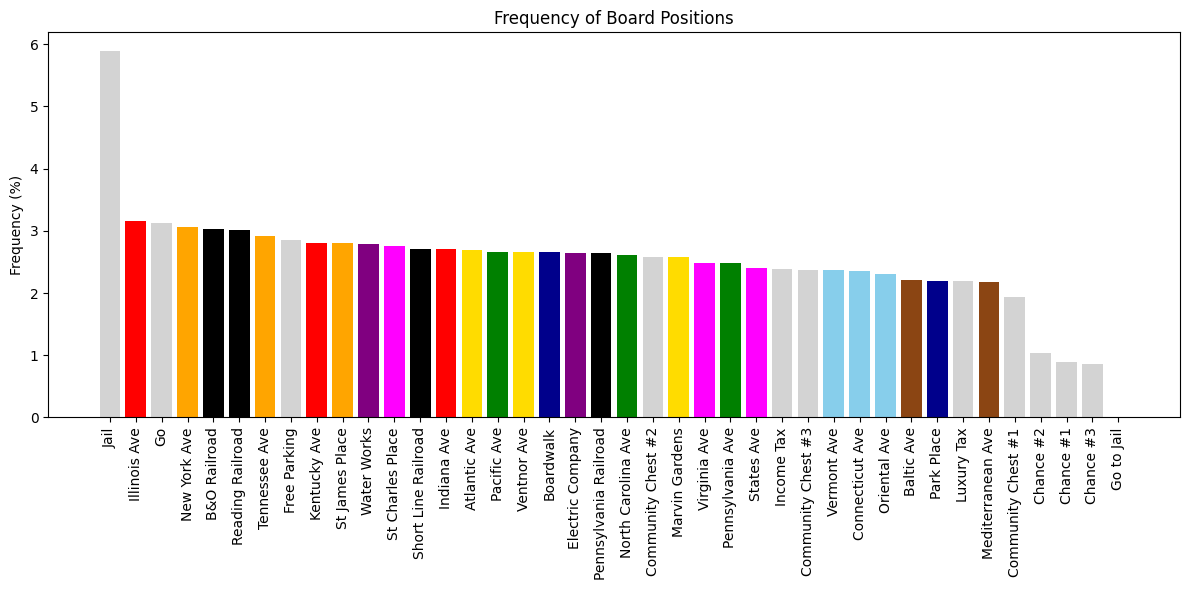

In [379]:
# Sort the positions and frequencies in descending order
sorted_positions_data = sorted(zip(board, percentage_frequencies), key=lambda x: x[1], reverse=True)
sorted_positions_names = [position for position, _ in sorted_positions_data]
sorted_positions_percentages = [percentage for _, percentage in sorted_positions_data]

# Update the property_colors dictionary to change Magenta to Pink
property_colors = {
    1: "Brown", 3: "Brown", 6: "Light Blue", 8: "Light Blue", 9: "Light Blue",
    11: "Pink", 13: "Pink", 14: "Pink", 16: "Orange", 18: "Orange", 19: "Orange",
    21: "Red", 23: "Red", 24: "Red", 26: "Yellow", 27: "Yellow", 29: "Yellow",
    31: "Green", 32: "Green", 34: "Green", 37: "Dark Blue", 39: "Dark Blue",
}

# Manually assign colors to each property set
property_set_colors = {
    "Brown": "saddlebrown",
    "Light Blue": "skyblue",
    "Pink": "magenta",
    "Orange": "orange",
    "Red": "red",
    "Yellow": "#FFDC00",  # Yellow color code
    "Green": "green",
    "Dark Blue": "darkblue",
}

# Create a dictionary to map positions to their corresponding colors
position_colors = {}
for position in range(len(board)):
    color = property_colors.get(position, None)
    if color:
        position_colors[board[position]] = property_set_colors[color]
    elif "Railroad" in board[position]:
        position_colors[board[position]] = "black"
    elif "Electric" in board[position]:
        position_colors[board[position]] = "purple"
    elif "Water" in board[position]:
        position_colors[board[position]] = "purple"
    else:
        position_colors[board[position]] = "lightgrey"  # Default color for other positions

# Create a bar graph for the top 20 most landed on positions
plt.figure(figsize=(12, 6))
plt.bar(sorted_positions_names, sorted_positions_percentages, color=[position_colors[position] for position in sorted_positions_names])
plt.xticks(rotation=90)
plt.xlabel('')
plt.ylabel('Frequency (%)')
plt.title('Frequency of Board Positions')
plt.tight_layout()
plt.show()



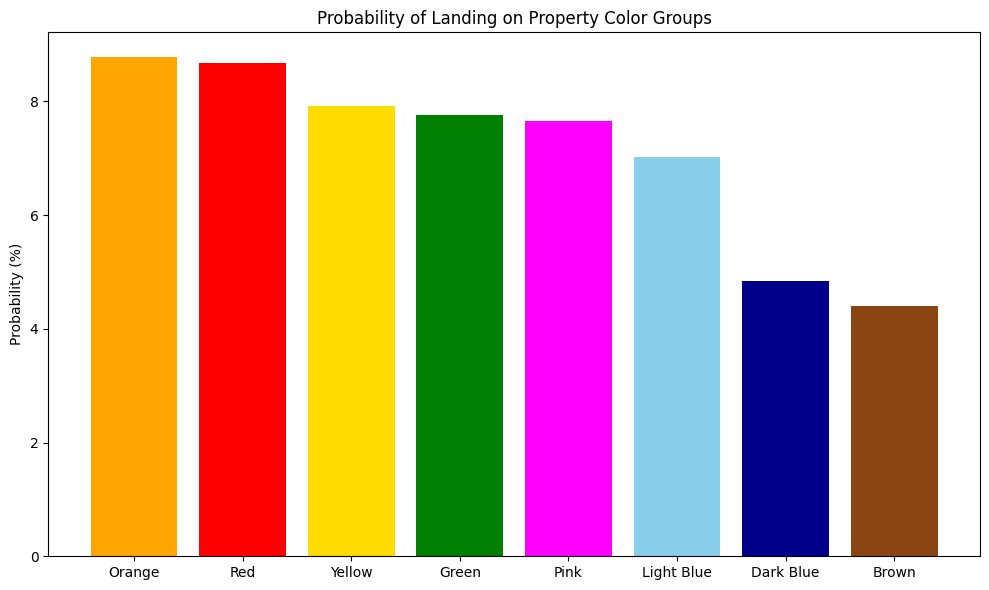

In [383]:
import matplotlib.pyplot as plt

# Update the property_colors dictionary to change Magenta to Pink
property_colors = {
    1: "Brown", 3: "Brown", 6: "Light Blue", 8: "Light Blue", 9: "Light Blue",
    11: "Pink", 13: "Pink", 14: "Pink", 16: "Orange", 18: "Orange", 19: "Orange",
    21: "Red", 23: "Red", 24: "Red", 26: "Yellow", 27: "Yellow", 29: "Yellow",
    31: "Green", 32: "Green", 34: "Green", 37: "Dark Blue", 39: "Dark Blue",
}

# Create a dictionary to store total frequencies for each color
color_frequencies = {}
for position, count in enumerate(position_counts):
    color = property_colors.get(position, None)
    if color:
        if color not in color_frequencies:
            color_frequencies[color] = 0
        color_frequencies[color] += count

# Calculate the total number of rolls
total_rolls = sum(position_counts)

# Calculate the probability percentage for each color
probability_percentages = [count / total_rolls * 100 for count in color_frequencies.values()]

# Manually assign colors to each property set
property_set_colors = {
    "Brown": "saddlebrown",
    "Light Blue": "skyblue",
    "Pink": "magenta",
    "Orange": "orange",
    "Red": "red",
    "Yellow": "#FFDC00",
    "Green": "green",
    "Dark Blue": "darkblue",
}

# Sort the color data in descending order of probability
sorted_color_data = sorted(zip(property_set_colors.keys(), probability_percentages), key=lambda x: x[1], reverse=True)
sorted_color_names = [color for color, _ in sorted_color_data]
sorted_color_percentages = [percentage for _, percentage in sorted_color_data]

# Create the bar graph
plt.figure(figsize=(10, 6))
plt.bar(sorted_color_names, sorted_color_percentages, color=[property_set_colors[color] for color in sorted_color_names])
plt.xlabel('')
plt.ylabel('Probability (%)')
plt.title('Probability of Landing on Property Color Groups')
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()


In [364]:
import pandas as pd
df = pd.read_csv("/Users/neel/Downloads/monopoly_properties.csv")

In [365]:
# Define a dictionary that maps property positions to their names
property_positions = {
    "Mediterranean Ave": 1,
    "Baltic Ave": 3,
    "Oriental Ave": 6,
    "Vermont Ave": 8,
    "Connecticut Ave": 9,
    "St Charles Place": 11,
    "States Ave": 13,
    "Virginia Ave": 14,
    "St James Place": 16,
    "Tennessee Ave": 18,
    "New York Ave": 19,
    "Kentucky Ave": 21,
    "Indiana Ave": 23,
    "Illinois Ave": 24,
    "Atlantic Ave": 26,
    "Ventnor Ave": 27,
    "Marvin Gardens": 29,
    "Pacific Ave": 31,
    "North Carolina Ave": 32,
    "Pennsylvania Ave": 34,
    "Park Place": 37,
    "Boardwalk": 39,
}

# Calculate the total number of rolls
total_rolls = sum(position_counts)

# Calculate the percentage frequency for each property
property_percentage_frequencies = [(position_counts[position] / total_rolls) * 100 for position in property_positions.values()]

# Add the property percentage frequencies to the DataFrame
df['frequency'] = property_percentage_frequencies

# Display the updated DataFrame
df

,property,set,cost,house_cost,rent,set_rent,1_house,2_houses,3_houses,4_houses,hotel,mortgage,unmortgage,frequency
0,Mediterranean Ave,Brown,60,50,2,4,10,30,90,160,250,30,33,2.17495
1,Baltic Ave,Brown,60,50,4,8,20,60,180,320,450,30,33,2.21242
2,Oriental Ave,Light Blue,100,50,6,12,30,90,270,400,550,50,55,2.30681
3,Vermont Ave,Light Blue,100,50,6,12,30,90,270,400,550,50,55,2.36606
4,Connecticut Ave,Light Blue,120,50,8,16,40,100,300,450,600,60,66,2.34128
5,St Charles Place,Pink,140,100,10,20,50,150,450,625,750,70,77,2.74407
6,States Ave,Pink,140,100,10,20,50,150,450,625,750,70,77,2.41019
7,Virginia Ave,Pink,160,100,12,24,60,180,500,700,900,80,88,2.48477
8,St James Place,Orange,180,100,14,28,70,200,550,750,950,90,99,2.78934
9,Tennessee Ave,Orange,180,100,14,28,70,200,550,750,950,90,99,2.92148


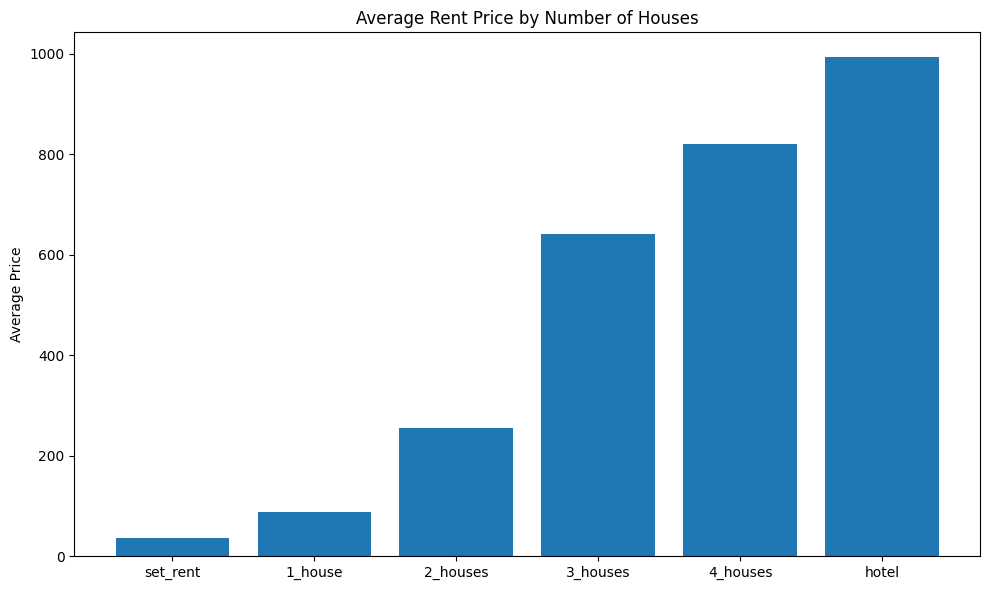

In [366]:
# Calculate the average price per type of rent
rent_types = ["set_rent", "1_house", "2_houses", "3_houses", "4_houses", "hotel"]
average_prices = {}
for rent_type in rent_types:
    average_prices[rent_type] = df[rent_type].mean()

# Create a bar graph for the average prices
plt.figure(figsize=(10, 6))
plt.bar(average_prices.keys(), average_prices.values())
plt.xlabel('')
plt.ylabel('Average Price')
plt.title('Average Rent Price by Number of Houses')
plt.tight_layout()
plt.show()

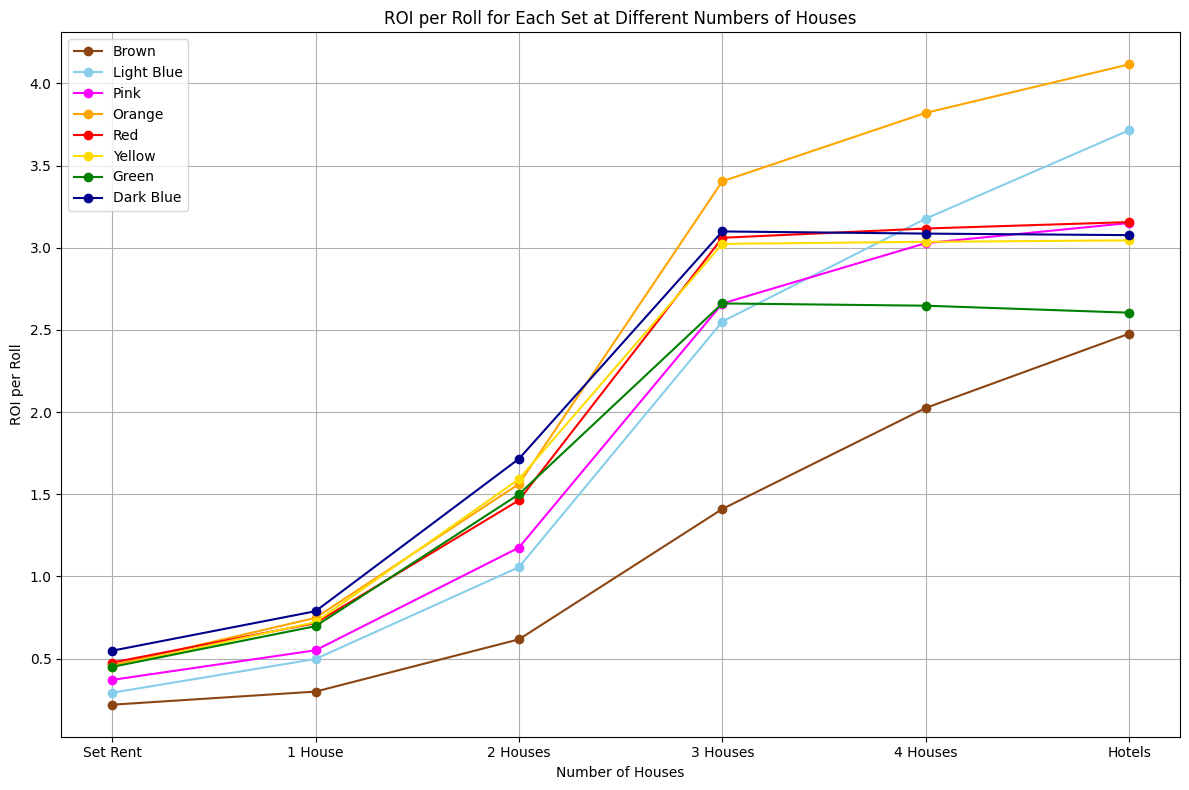

In [435]:
# Define the ROI per roll values for each set and number of houses
roi_values = {
    'Set Rent': {'Brown': 0.2193685, 'Light Blue': 0.29225625, 'Pink': 0.37037721212121205, 'Orange': 0.45938828571428564, 'Red': 0.47591215686274513, 'Yellow': 0.4510105666666668, 'Green': 0.44951826086956526, 'Dark Blue': 0.5478828000000001},
    '1 House': {'Brown': 0.2991388636363636, 'Light Blue': 0.4974574468085106, 'Pink': 0.5505607207207206, 'Orange': 0.7478413953488372, 'Red': 0.7159740412979353, 'Yellow': 0.7216169066666669, 'Green': 0.6971969078947369, 'Dark Blue': 0.7881945652173914},
    '2 Houses': {'Brown': 0.6169739062499999, 'Light Blue': 1.0558935483870968, 'Pink': 1.1752353846153845, 'Orange': 1.5624962068965518, 'Red': 1.4630210970464135, 'Yellow': 1.5918020000000002, 'Green': 1.4996310849056604, 'Dark Blue': 1.7153825806451615},
    '3 Houses': {'Brown': 1.4102260714285713, 'Light Blue': 2.5506, 'Pink': 2.6603587064676617, 'Orange': 3.403935616438356, 'Red': 3.060272577996716, 'Yellow': 3.023189844961241, 'Green': 2.6607514705882354, 'Dark Blue': 3.0988846153846157},
    '4 Houses': {'Brown': 2.02494, 'Light Blue': 3.1766983695652176, 'Pink': 3.0276643292682928, 'Orange': 3.820326136363636, 'Red': 3.1166626344086024, 'Yellow': 3.0356480448717953, 'Green': 2.64701265060241, 'Dark Blue': 3.085697872340426},
    'Hotels': {'Brown': 2.476741129032258, 'Light Blue': 3.714658878504673, 'Pink': 3.1501154639175253, 'Orange': 4.11543786407767, 'Red': 3.155731513083049, 'Yellow': 3.0444300546448093, 'Green': 2.6045110969387752, 'Dark Blue': 3.0763472727272725}
}

# Create a line graph
plt.figure(figsize=(12, 8))

for color, roi_data in property_set_colors.items():
    roi_values_for_color = {key: value[color] for key, value in roi_values.items()}
    plt.plot(list(roi_values_for_color.keys()), list(roi_values_for_color.values()), label=color, marker='o', color=property_set_colors[color])

plt.xlabel('Number of Houses')
plt.ylabel('ROI per Roll')
plt.title('ROI per Roll for Each Set at Different Numbers of Houses')
plt.legend()
plt.grid()
plt.tight_layout()
plt.gca()
plt.show()
